In [1]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# for visualisation
import matplotlib.pyplot as plt

In [2]:
#Importing the datasets
#college_df = pd.read_csv("college_df_fix.csv")
college_df = pd.read_csv("college_ratings_test.csv")

college_df.head()

C:\Users\xavim\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,pos,year,player_name,team,conf,GP,Min_per,Ortg,usg,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,unk
0,0,Pure PG,2016,Aakim Saintil,LIU Brooklyn,NEC,31,72.2,99.7,25.1,...,-0.927424,-1.843510,0.3871,1.8387,2.2258,4.7097,1.4839,0.0323,12.6452,7.80165
1,1,Scoring PG,2014,Aakim Saintil,South Alabama,SB,28,56.5,90.7,18.8,...,-4.297530,0.537531,0.5000,1.4643,1.9643,1.8214,1.0000,0.0714,6.2500,6.25566
2,2,Pure PG,2013,Aalim Moor,San Jose St.,WAC,20,17.6,92.1,14.6,...,-4.047400,0.625015,0.1000,0.5500,0.6500,0.9500,0.3500,0.1500,2.2500,5.65181
3,8,Scoring PG,2020,Aamahne Santos,Jacksonville,ASun,28,68.0,91.3,16.9,...,-2.791630,-0.299500,0.2333,2.1000,2.3333,2.6000,0.8000,0.0000,7.8667,7.87045
4,9,Combo G,2019,Aamahne Santos,Jacksonville,ASun,30,73.4,94.8,13.6,...,-2.669560,-1.502740,0.3125,1.4688,1.7812,2.4375,0.6250,0.0625,6.7812,7.43771


In [3]:
#Importing the datasets
rating_df = pd.read_csv("modern_raptor.csv")
rating_df.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alex Abrines,abrinal01,2017,2387,1135,0.745505,-0.372938,0.372567,-0.418553,-3.857011,...,0.543421,-1.144832,-0.601411,1.249008,1.447708,-0.198700,0.077102,-1.038677,-0.961575,0.326413
1,Alex Abrines,abrinal01,2018,2546,1244,0.317549,-1.725325,-1.407776,-1.291727,-0.049694,...,-0.020826,-1.502642,-1.523468,0.777304,0.465912,0.311392,-0.174621,-1.112625,-1.287247,-0.456141
2,Alex Abrines,abrinal01,2019,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,...,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013
3,Precious Achiuwa,achiupr01,2021,1581,749,-4.122966,1.359278,-2.763688,-4.050779,-0.919712,...,-4.347596,0.954821,-3.392775,-0.246055,-0.246776,0.000721,-3.817713,0.474828,-3.342885,0.329157
4,Precious Achiuwa,achiupr01,2022,3802,1892,-2.521510,1.763502,-0.758008,-1.687893,3.103441,...,-2.517372,2.144151,-0.373221,2.262658,2.309611,-0.046953,-2.483956,2.024360,-0.459596,-0.728610


In [4]:
college_df.columns

Index(['Unnamed: 0', 'pos', 'year', 'player_name', 'team', 'conf', 'GP',
       'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per',
       'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA',
       'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'yr',
       'ht', 'num', 'porpag', 'adjoe', 'pfr', 'pid', 'type', 'Rec Rank',
       ' ast/tov', ' rimmade', ' rimmade+rimmiss', ' midmade',
       ' midmade+midmiss', ' rimmade/(rimmade+rimmiss)',
       ' midmade/(midmade+midmiss)', ' dunksmade', ' dunksmiss+dunksmade',
       ' dunksmade/(dunksmade+dunksmiss)', ' pick', ' drtg', 'adrtg',
       ' dporpag', ' stops', ' bpm', ' obpm', ' dbpm', ' gbpm', 'mp', 'ogbpm',
       'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'unk'],
      dtype='object')

In [5]:
college_df = college_df[college_df['player_name'] != 'Kawhi Leonard']

In [6]:
yr = college_df['yr'].values
seasons = []
for year in yr:
    if year == 'Fr':
        seasons.append(4)
    elif year == 'So':
        seasons.append(3)
    elif year == 'Jr':
        seasons.append(2)
    elif year == 'Sr':
        seasons.append(1)
    else:
        seasons.append(0)
college_df['season'] = seasons

In [7]:
#Cleaning college_df dataset by removing irrelevant columns and selecting players who were drafted for the nba
college_df['ast/tov'] = college_df[' ast/tov']
#college_df['rimmade'] = college_df[' rimmade']
#college_df['rimmade+rimmiss'] = college_df[' rimmade+rimmiss'] 
#college_df['midmade'] = college_df[' midmade'] 
#college_df['midmade+midmiss'] = college_df[' midmade+midmiss'] 
college_df['rimmade/(rimmade+rimmiss)'] = college_df[' rimmade/(rimmade+rimmiss)'] 
college_df['midmade/(midmade+midmiss)'] = college_df[' midmade/(midmade+midmiss)'] 
#college_df['pick'] = college_df[' pick'] 
college_df['drtg'] = college_df[' drtg'] 
college_df['dporpag'] = college_df[' dporpag'] 
college_df['stops'] = college_df[' stops'] 
college_df['bpm'] = college_df[' bpm'] 
college_df['obpm'] = college_df[' obpm'] 
college_df['dbpm'] = college_df[' dbpm'] 
college_df['gbpm'] = college_df[' gbpm'] 
college_df.drop('pid',axis=1, inplace=True)
college_df.drop(' ast/tov',axis=1, inplace=True)
college_df.drop(' rimmade',axis=1, inplace=True)
college_df.drop(' midmade',axis=1, inplace=True)
college_df.drop(' rimmade+rimmiss',axis=1, inplace=True)
college_df.drop(' midmade+midmiss',axis=1, inplace=True)
college_df.drop(' rimmade/(rimmade+rimmiss)',axis=1, inplace=True)
college_df.drop(' midmade/(midmade+midmiss)',axis=1, inplace=True)
college_df.drop(' dunksmade',axis=1, inplace=True)
college_df.drop(' dunksmiss+dunksmade',axis=1, inplace=True)
college_df.drop(' dunksmade/(dunksmade+dunksmiss)',axis=1, inplace=True)
college_df.drop(' pick',axis=1, inplace=True)
college_df.drop(' drtg',axis=1, inplace=True)
college_df.drop(' dporpag',axis=1, inplace=True)
college_df.drop(' stops',axis=1, inplace=True)
college_df.drop(' bpm',axis=1, inplace=True)
college_df.drop(' obpm',axis=1, inplace=True)
college_df.drop(' dbpm',axis=1, inplace=True)
college_df.drop(' gbpm',axis=1, inplace=True)
college_df.drop('ht',axis=1, inplace=True)
college_df.drop('team',axis=1, inplace=True)
college_df.drop('conf',axis=1, inplace=True)
college_df.drop('num',axis=1, inplace=True)
#college_df.drop('pfr',axis=1, inplace=True)
college_df.drop('type',axis=1, inplace=True)
#college_df.drop('Rec Rank',axis=1, inplace=True)
#college_df.drop('pos',axis=1, inplace=True)
college_df.drop('GP',axis=1, inplace=True)
college_df.drop('Min_per',axis=1, inplace=True)
college_df.drop('FTM',axis=1, inplace=True)
college_df.drop('FTA',axis=1, inplace=True)
#college_df.drop('FT_per',axis=1, inplace=True)
college_df.drop('Unnamed: 0',axis=1, inplace=True)
'''
#college_df.drop('TS_per',axis=1, inplace=True)
#college_df.drop('ORB_per',axis=1, inplace=True)
#college_df.drop('DRB_per',axis=1, inplace=True)
#college_df.drop('AST_per',axis=1, inplace=True)
college_df.drop('twoPM',axis=1, inplace=True)
college_df.drop('twoPA',axis=1, inplace=True)
#college_df.drop('twoP_per',axis=1, inplace=True)
college_df.drop('TPM',axis=1, inplace=True)
college_df.drop('TPA',axis=1, inplace=True)
#college_df.drop('blk_per',axis=1, inplace=True)
college_df.drop('TP_per',axis=1, inplace=True)
#college_df.drop('stl_per',axis=1, inplace=True)
#college_df.drop('ftr',axis=1, inplace=True)

college_df.drop('TO_per',axis=1, inplace=True)
#college_df.drop('ogbpm',axis=1, inplace=True)
#college_df.drop('dgbpm',axis=1, inplace=True)
college_df.drop('oreb',axis=1, inplace=True)
college_df.drop('dreb',axis=1, inplace=True)
college_df.drop('treb',axis=1, inplace=True)
college_df.drop('ast',axis=1, inplace=True)
college_df.drop('stl',axis=1, inplace=True)
#college_df.drop('porpag',axis=1, inplace=True)
college_df.drop('blk',axis=1, inplace=True)
college_df.drop('unk',axis=1, inplace=True)
#college_df.drop('stops',axis=1, inplace=True)

#college_df.drop('bpm',axis=1, inplace=True)
college_df.drop('obpm',axis=1, inplace=True)
#college_df.drop('dbpm',axis=1, inplace=True)
#college_df.drop('gbpm',axis=1, inplace=True)
college_df.drop('usg',axis=1, inplace=True)
#college_df.drop('adjoe',axis=1, inplace=True)
college_df.drop('mp',axis=1, inplace=True)
#college_df.drop('pts',axis=1, inplace=True)
'''

"\n#college_df.drop('TS_per',axis=1, inplace=True)\n#college_df.drop('ORB_per',axis=1, inplace=True)\n#college_df.drop('DRB_per',axis=1, inplace=True)\n#college_df.drop('AST_per',axis=1, inplace=True)\ncollege_df.drop('twoPM',axis=1, inplace=True)\ncollege_df.drop('twoPA',axis=1, inplace=True)\n#college_df.drop('twoP_per',axis=1, inplace=True)\ncollege_df.drop('TPM',axis=1, inplace=True)\ncollege_df.drop('TPA',axis=1, inplace=True)\n#college_df.drop('blk_per',axis=1, inplace=True)\ncollege_df.drop('TP_per',axis=1, inplace=True)\n#college_df.drop('stl_per',axis=1, inplace=True)\n#college_df.drop('ftr',axis=1, inplace=True)\n\ncollege_df.drop('TO_per',axis=1, inplace=True)\n#college_df.drop('ogbpm',axis=1, inplace=True)\n#college_df.drop('dgbpm',axis=1, inplace=True)\ncollege_df.drop('oreb',axis=1, inplace=True)\ncollege_df.drop('dreb',axis=1, inplace=True)\ncollege_df.drop('treb',axis=1, inplace=True)\ncollege_df.drop('ast',axis=1, inplace=True)\ncollege_df.drop('stl',axis=1, inplace=Tr

In [8]:
college_df.columns

Index(['pos', 'year', 'player_name', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per',
       'DRB_per', 'AST_per', 'TO_per', 'FT_per', 'twoPM', 'twoPA', 'twoP_per',
       'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'yr', 'porpag',
       'adjoe', 'pfr', 'Rec Rank', 'adrtg', 'mp', 'ogbpm', 'dgbpm', 'oreb',
       'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'unk', 'season', 'ast/tov',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'drtg',
       'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm'],
      dtype='object')

In [9]:
rating_df.columns

Index(['player_name', 'player_id', 'season', 'poss', 'mp',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact'],
      dtype='object')

In [10]:
#Lowercasing all player names in rating_df
l_names = []
r_names = rating_df.player_name.values
for name in r_names:
    l_names.append(name.lower())
rating_df['player_name'] = l_names
rating_df.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,alex abrines,abrinal01,2017,2387,1135,0.745505,-0.372938,0.372567,-0.418553,-3.857011,...,0.543421,-1.144832,-0.601411,1.249008,1.447708,-0.198700,0.077102,-1.038677,-0.961575,0.326413
1,alex abrines,abrinal01,2018,2546,1244,0.317549,-1.725325,-1.407776,-1.291727,-0.049694,...,-0.020826,-1.502642,-1.523468,0.777304,0.465912,0.311392,-0.174621,-1.112625,-1.287247,-0.456141
2,alex abrines,abrinal01,2019,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,...,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013
3,precious achiuwa,achiupr01,2021,1581,749,-4.122966,1.359278,-2.763688,-4.050779,-0.919712,...,-4.347596,0.954821,-3.392775,-0.246055,-0.246776,0.000721,-3.817713,0.474828,-3.342885,0.329157
4,precious achiuwa,achiupr01,2022,3802,1892,-2.521510,1.763502,-0.758008,-1.687893,3.103441,...,-2.517372,2.144151,-0.373221,2.262658,2.309611,-0.046953,-2.483956,2.024360,-0.459596,-0.728610


In [11]:
ignore = []
players = list(rating_df['player_name'].values)
years = list(rating_df['season'].values)
for i in range(len(players)):
    if years[i] == 2014:
        ignore.append(players[i])

In [12]:
#Getting rid off outliers
rating_df = rating_df[rating_df['mp']>500]

In [13]:
#Only using players that have played for more than 1 year
players = rating_df['player_name'].values
seasons = {}
for player in players:
    if player not in seasons:
        seasons[player] = 1
    else:
        seasons[player] += 1

seasons_players = []
for player in seasons:
    if seasons[player] > 1:
        seasons_players.append(player)

rating_df = rating_df[rating_df.player_name.isin(seasons_players)]



In [14]:
#lowercasing all player names in college_df
l_names = []
c_names = college_df.player_name.values
for name in c_names:
    if isinstance(name, str):
        l_names.append(name.lower())

len(college_df['player_name'])
college_df['player_name'] = l_names
college_df.head()


,pos,year,player_name,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,...,ast/tov,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),drtg,dporpag,stops,bpm,obpm,dbpm,gbpm
0,Pure PG,2016,aakim saintil,99.7,25.1,42.4,51.19,1.4,6.9,30.7,...,1.622245,0.4955,0.3651,105.915,1.566640,159.6240,-3.26644,0.030543,-3.296980,-2.77093
1,Scoring PG,2014,aakim saintil,90.7,18.8,38.8,45.78,2.4,7.2,16.8,...,1.186039,0.4000,0.2941,107.276,1.690990,104.7200,-2.51437,-1.580690,-0.933676,-3.76000
2,Pure PG,2013,aalim moor,92.1,14.6,53.6,53.57,1.0,6.6,22.3,...,1.266667,0.0000,0.6000,104.499,0.726367,31.8236,-4.95061,-3.839940,-1.110670,-3.42239
3,Scoring PG,2020,aamahne santos,91.3,16.9,43.4,45.46,1.0,7.5,17.7,...,1.500029,0.3333,0.4286,102.478,2.244270,127.3050,-2.76325,-1.505430,-1.257820,-3.09113
4,Combo G,2019,aamahne santos,94.8,13.6,44.5,48.35,1.3,5.7,13.6,...,1.591889,0.4400,0.3404,110.180,1.706020,124.2970,-4.17925,-1.570270,-2.608980,-4.17229


In [15]:
#Removing players who arent in the college basketball table
names = college_df.player_name.unique()
rating_df = rating_df[rating_df.player_name.isin(names)]

In [16]:
#Removing players who arent in the ratings table
names = rating_df.player_name.unique()
college_df = college_df[college_df.player_name.isin(names)]

In [17]:
#Creating a multiplier depending on what year it is
multiplier = []
l_name = ''
years = 0
for name in rating_df['player_name'].values:
    if name not in ignore:
        if name == l_name:
            years += 1
        else:
            l_name = name
            years = 1

        if years == 1:
            multiplier.append(1.2)
        elif years == 2:
            multiplier.append(1.1) 
        else:
            multiplier.append(1)
    else:
        multiplier.append(1)

rating_df['multiplier'] = multiplier

In [18]:
rating_df = rating_df[rating_df['multiplier'] == 1]

In [19]:
#Scaling predator score between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pt_rating = (rating_df['predator_total'].values).reshape(-1,1)

rating = []
n_rating = scaler.fit_transform(pt_rating)
for i in range(len(n_rating)):
    rating.append((n_rating[i]*multiplier[i])[0])

rating_df['pt_rating'] = rating
rating_df['pt_rating'] 

5       0.437376
6       0.237211
7       0.380892
8       0.402640
9       0.308938
          ...   
4666    0.386711
4667    0.425615
4668    0.300769
4669    0.233047
4670    0.275324
Name: pt_rating, Length: 1227, dtype: float64

In [20]:
#Scaling raptor score between 0 and 1
scaler = MinMaxScaler()
raptor_rating = (rating_df['raptor_total'].values).reshape(-1,1)

rating = []
n_rating = scaler.fit_transform(raptor_rating)
for i in range(len(n_rating)):
    rating.append((n_rating[i]*multiplier[i])[0])

rating_df['raptor_rating'] = rating
rating_df['raptor_rating'] 

5       0.428473
6       0.324348
7       0.444976
8       0.471447
9       0.295431
          ...   
4666    0.545865
4667    0.455337
4668    0.318264
4669    0.348035
4670    0.297997
Name: raptor_rating, Length: 1227, dtype: float64

In [21]:
#Scaling war score between 0 and 1
scaler = MinMaxScaler()
war_rating = (rating_df['war_total'].values).reshape(-1,1)

rating = []
n_rating = scaler.fit_transform(war_rating)
for i in range(len(n_rating)):
    rating.append((n_rating[i]*multiplier[i])[0])

rating_df['war_rating'] = rating
rating_df['war_rating'] 

5       0.161266
6       0.127209
7       0.160955
8       0.150147
9       0.115723
          ...   
4666    0.204874
4667    0.212967
4668    0.123564
4669    0.128008
4670    0.116680
Name: war_rating, Length: 1227, dtype: float64

In [22]:
rating_df.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,multiplier,pt_rating,raptor_rating,war_rating
5,quincy acy,acyqu01,2014,1716,847,-1.716079,0.133115,-1.582964,-0.324811,-1.661495,...,0.415918,0.0,-1.464417,-0.223754,-1.688171,-0.554898,1.0,0.437376,0.428473,0.161266
6,quincy acy,acyqu01,2015,2517,1287,-2.014956,-1.268440,-3.283396,-3.855207,2.803842,...,-0.083313,0.0,-2.797224,-1.648024,-4.445248,-0.100454,1.0,0.237211,0.324348,0.127209
7,quincy acy,acyqu01,2016,1852,876,-0.008328,0.340783,0.332456,-2.798490,0.130301,...,1.123479,0.0,-1.406108,0.021970,-1.384138,-0.102988,1.0,0.380892,0.444976,0.160955
8,quincy acy,acyqu01,2017,1169,558,-0.129002,0.444339,0.315337,-1.345267,0.806701,...,0.835632,0.0,-0.922087,-0.059177,-0.981264,0.125008,1.0,0.402640,0.471447,0.150147
9,quincy acy,acyqu01,2018,2856,1359,-2.620032,-0.806269,-3.426301,0.055170,-0.019195,...,-0.081232,0.0,-1.826813,-0.890246,-2.717059,0.136139,1.0,0.308938,0.295431,0.115723


In [23]:
rating_df['total_score'] = round(((rating_df['war_rating']*2/8) + (rating_df['raptor_rating']*3/8) + (rating_df['pt_rating']*3/8))*100, 2)

In [24]:
rating_df

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,multiplier,pt_rating,raptor_rating,war_rating,total_score
5,quincy acy,acyqu01,2014,1716,847,-1.716079,0.133115,-1.582964,-0.324811,-1.661495,...,0.000000,-1.464417,-0.223754,-1.688171,-0.554898,1.0,0.437376,0.428473,0.161266,36.50
6,quincy acy,acyqu01,2015,2517,1287,-2.014956,-1.268440,-3.283396,-3.855207,2.803842,...,0.000000,-2.797224,-1.648024,-4.445248,-0.100454,1.0,0.237211,0.324348,0.127209,24.24
7,quincy acy,acyqu01,2016,1852,876,-0.008328,0.340783,0.332456,-2.798490,0.130301,...,0.000000,-1.406108,0.021970,-1.384138,-0.102988,1.0,0.380892,0.444976,0.160955,34.99
8,quincy acy,acyqu01,2017,1169,558,-0.129002,0.444339,0.315337,-1.345267,0.806701,...,0.000000,-0.922087,-0.059177,-0.981264,0.125008,1.0,0.402640,0.471447,0.150147,36.53
9,quincy acy,acyqu01,2018,2856,1359,-2.620032,-0.806269,-3.426301,0.055170,-0.019195,...,0.000000,-1.826813,-0.890246,-2.717059,0.136139,1.0,0.308938,0.295431,0.115723,25.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4666,tyler zeller,zellety01,2014,2088,1049,-1.256580,2.095302,0.838722,0.321454,3.386379,...,0.000000,-1.628918,0.352563,-1.276356,-0.183268,1.0,0.386711,0.545865,0.204874,40.09
4667,tyler zeller,zellety01,2015,3711,1821,-0.380890,0.602361,0.221471,-0.971372,-0.160065,...,0.097906,-0.876438,0.320770,-0.555668,-0.025132,1.0,0.425615,0.455337,0.212967,38.36
4668,tyler zeller,zellety01,2016,1584,748,-3.337422,1.591071,-1.746350,-4.721897,0.320108,...,0.206971,-3.509643,0.641257,-2.868386,0.595796,1.0,0.300769,0.318264,0.123564,26.30
4669,tyler zeller,zellety01,2017,1249,603,-2.931352,1.169902,-1.761450,-2.335615,0.377016,...,-0.048021,-3.350335,-0.772587,-4.122921,-0.406228,1.0,0.233047,0.348035,0.128008,24.99


<AxesSubplot:xlabel='player_name'>

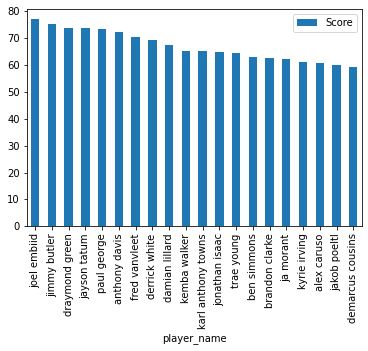

In [25]:
#Who are the best players in the nba
group_best = rating_df.groupby(by=['player_name'])

group_best_player = round(group_best.mean(), 2)

best_player = group_best_player.sort_values(by='total_score', ascending = False)

best_player = pd.DataFrame({'Score': best_player['total_score']}).head(20)

best_player.rename(columns={'Name': 'Score'}, inplace=True)

best_player.plot(kind='bar')

In [26]:
#Creating csv to analyse the data
rating_df.to_csv('final_season_ratings.csv')
group_best_player.to_csv('final_player_ratings.csv')

In [27]:
final_ratings = pd.read_csv("final_player_ratings.csv")

In [28]:
final_ratings

,player_name,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,...,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,multiplier,pt_rating,raptor_rating,war_rating,total_score
0,aaron gordon,2019.5,4559.83,2206.67,-0.38,0.35,-0.03,2.65,-0.48,2.17,...,0.10,0.18,-0.12,0.06,-0.10,1.0,0.47,0.50,0.26,43.10
1,aaron holiday,2021.5,2359.50,1108.50,-0.66,-0.38,-1.04,-1.13,-0.35,-1.48,...,0.26,-1.17,-0.79,-1.96,0.31,1.0,0.37,0.41,0.16,32.88
2,abdel nader,2020.0,1893.00,892.00,-2.56,0.01,-2.55,-6.89,0.71,-6.18,...,-0.01,-3.69,-0.70,-4.40,-0.18,1.0,0.22,0.26,0.11,20.55
3,al farouq aminu,2016.5,4457.17,2175.67,-1.01,1.80,0.79,0.92,1.14,2.07,...,0.60,-0.49,1.82,1.33,-0.13,1.0,0.53,0.53,0.28,46.80
4,alec burks,2018.0,2839.56,1405.11,0.70,-1.08,-0.38,-1.23,0.15,-1.08,...,0.11,0.05,-0.58,-0.53,-0.41,1.0,0.44,0.44,0.20,37.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,willie cauley stein,2019.5,3308.75,1580.75,-3.05,2.32,-0.74,-0.99,2.04,1.05,...,-0.02,-2.73,2.03,-0.70,-0.38,1.0,0.44,0.46,0.19,38.59
305,willie green,2014.5,1862.00,919.50,-2.65,-0.84,-3.49,-4.70,3.24,-1.45,...,-0.03,-2.83,-0.51,-3.35,0.15,1.0,0.28,0.27,0.11,23.23
306,yogi ferrell,2019.5,1716.00,798.50,0.11,0.53,0.65,-1.67,1.09,-0.58,...,0.00,-0.74,-0.43,-1.17,-0.76,1.0,0.41,0.51,0.18,39.06
307,zach collins,2022.0,1089.00,502.00,-3.38,-0.14,-3.52,-1.80,0.22,-1.58,...,0.00,-3.69,0.24,-3.44,0.98,1.0,0.27,0.27,0.11,23.10


In [29]:
ratings = []
names = college_df.player_name.values
for name in names:
    if name in final_ratings['player_name'].values:
        ratings.append(final_ratings[final_ratings['player_name'] == name]['total_score'].values[0])
    else:
        ratings.append(None)

college_df['rating'] = ratings
college_df

,pos,year,player_name,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,...,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),drtg,dporpag,stops,bpm,obpm,dbpm,gbpm,rating
137,Wing F,2014,aaron gordon,105.5,23.2,51.6,50.27,10.4,19.3,13.0,...,0.6919,0.2571,87.7492,4.96193,242.8230,8.31790,2.890220,5.427680,7.173640,43.10
158,Scoring PG,2016,aaron holiday,94.5,20.4,46.2,50.03,2.0,7.8,21.1,...,0.4789,0.3280,106.8700,3.09933,181.3660,1.72579,0.364815,1.360970,0.679715,32.88
159,Scoring PG,2017,aaron holiday,113.1,23.2,57.1,60.96,1.5,9.5,24.4,...,0.6413,0.4318,103.9700,2.65112,174.7920,3.35938,3.562440,-0.203062,3.731440,32.88
160,Scoring PG,2018,aaron holiday,112.9,27.2,55.7,60.87,1.6,8.7,29.9,...,0.5695,0.3654,106.9280,3.33270,209.1670,4.36451,4.730040,-0.365525,5.015550,32.88
194,Stretch 4,2019,aaron nesmith,104.4,19.8,49.3,53.65,4.2,17.3,10.8,...,0.6000,0.2826,103.6610,3.08441,175.4140,2.17846,0.993082,1.185370,2.914360,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44581,C,2018,xavier tillman,121.8,15.7,65.0,65.82,14.7,18.6,5.7,...,0.6957,0.5000,89.8333,1.30332,71.7715,8.52010,2.918570,5.601530,7.472060,NaN
44670,Scoring PG,2016,yogi ferrell,124.9,24.7,55.0,59.99,3.5,9.3,28.4,...,0.6098,0.3590,104.5040,3.45797,190.2720,6.40013,6.797870,-0.397745,6.580390,39.06
44808,C,2017,zach collins,120.6,24.8,67.6,70.32,12.2,23.2,4.4,...,0.7480,0.5085,79.0742,3.09468,185.3670,9.54386,2.600420,6.943440,9.978120,23.10
44913,Wing G,2014,zach lavine,107.3,19.0,52.4,54.48,2.4,9.5,12.6,...,0.5667,0.4118,103.5640,2.59395,148.5040,2.74348,2.461770,0.281707,1.999420,39.58


In [30]:
#Scaling rating between 0 and 100
scaler = MinMaxScaler()
score = (college_df['rating'].values).reshape(-1,1)

scores = []
n_rating = scaler.fit_transform(score)
for i in range(len(score)):
    scores.append((n_rating[i]*100)[0])

college_df['score'] = scores

In [31]:
college_df.drop('rating',axis=1, inplace=True)

In [32]:
college_df.to_csv('final_college_df.csv')